In [145]:
import warnings
warnings.simplefilter("ignore")
import joblib
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import power_transform#importing the necessary libraries

In [146]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df                            #loading the dataset from Github repository link using raw option

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [147]:
df.shape                      #looking for the shape of the dataset

(158, 12)

In [148]:
df.columns                    #looking for the columns present in the datset

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [149]:
df.isnull().sum()                    #checking if any null values present in the dataset or not

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No null values are present in the dataset.

In [150]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

It is clear that 2 columns are having object as datatype, 1 column having int64 as datatype
and 9 columns are having float as datatype.

In [151]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# EDA

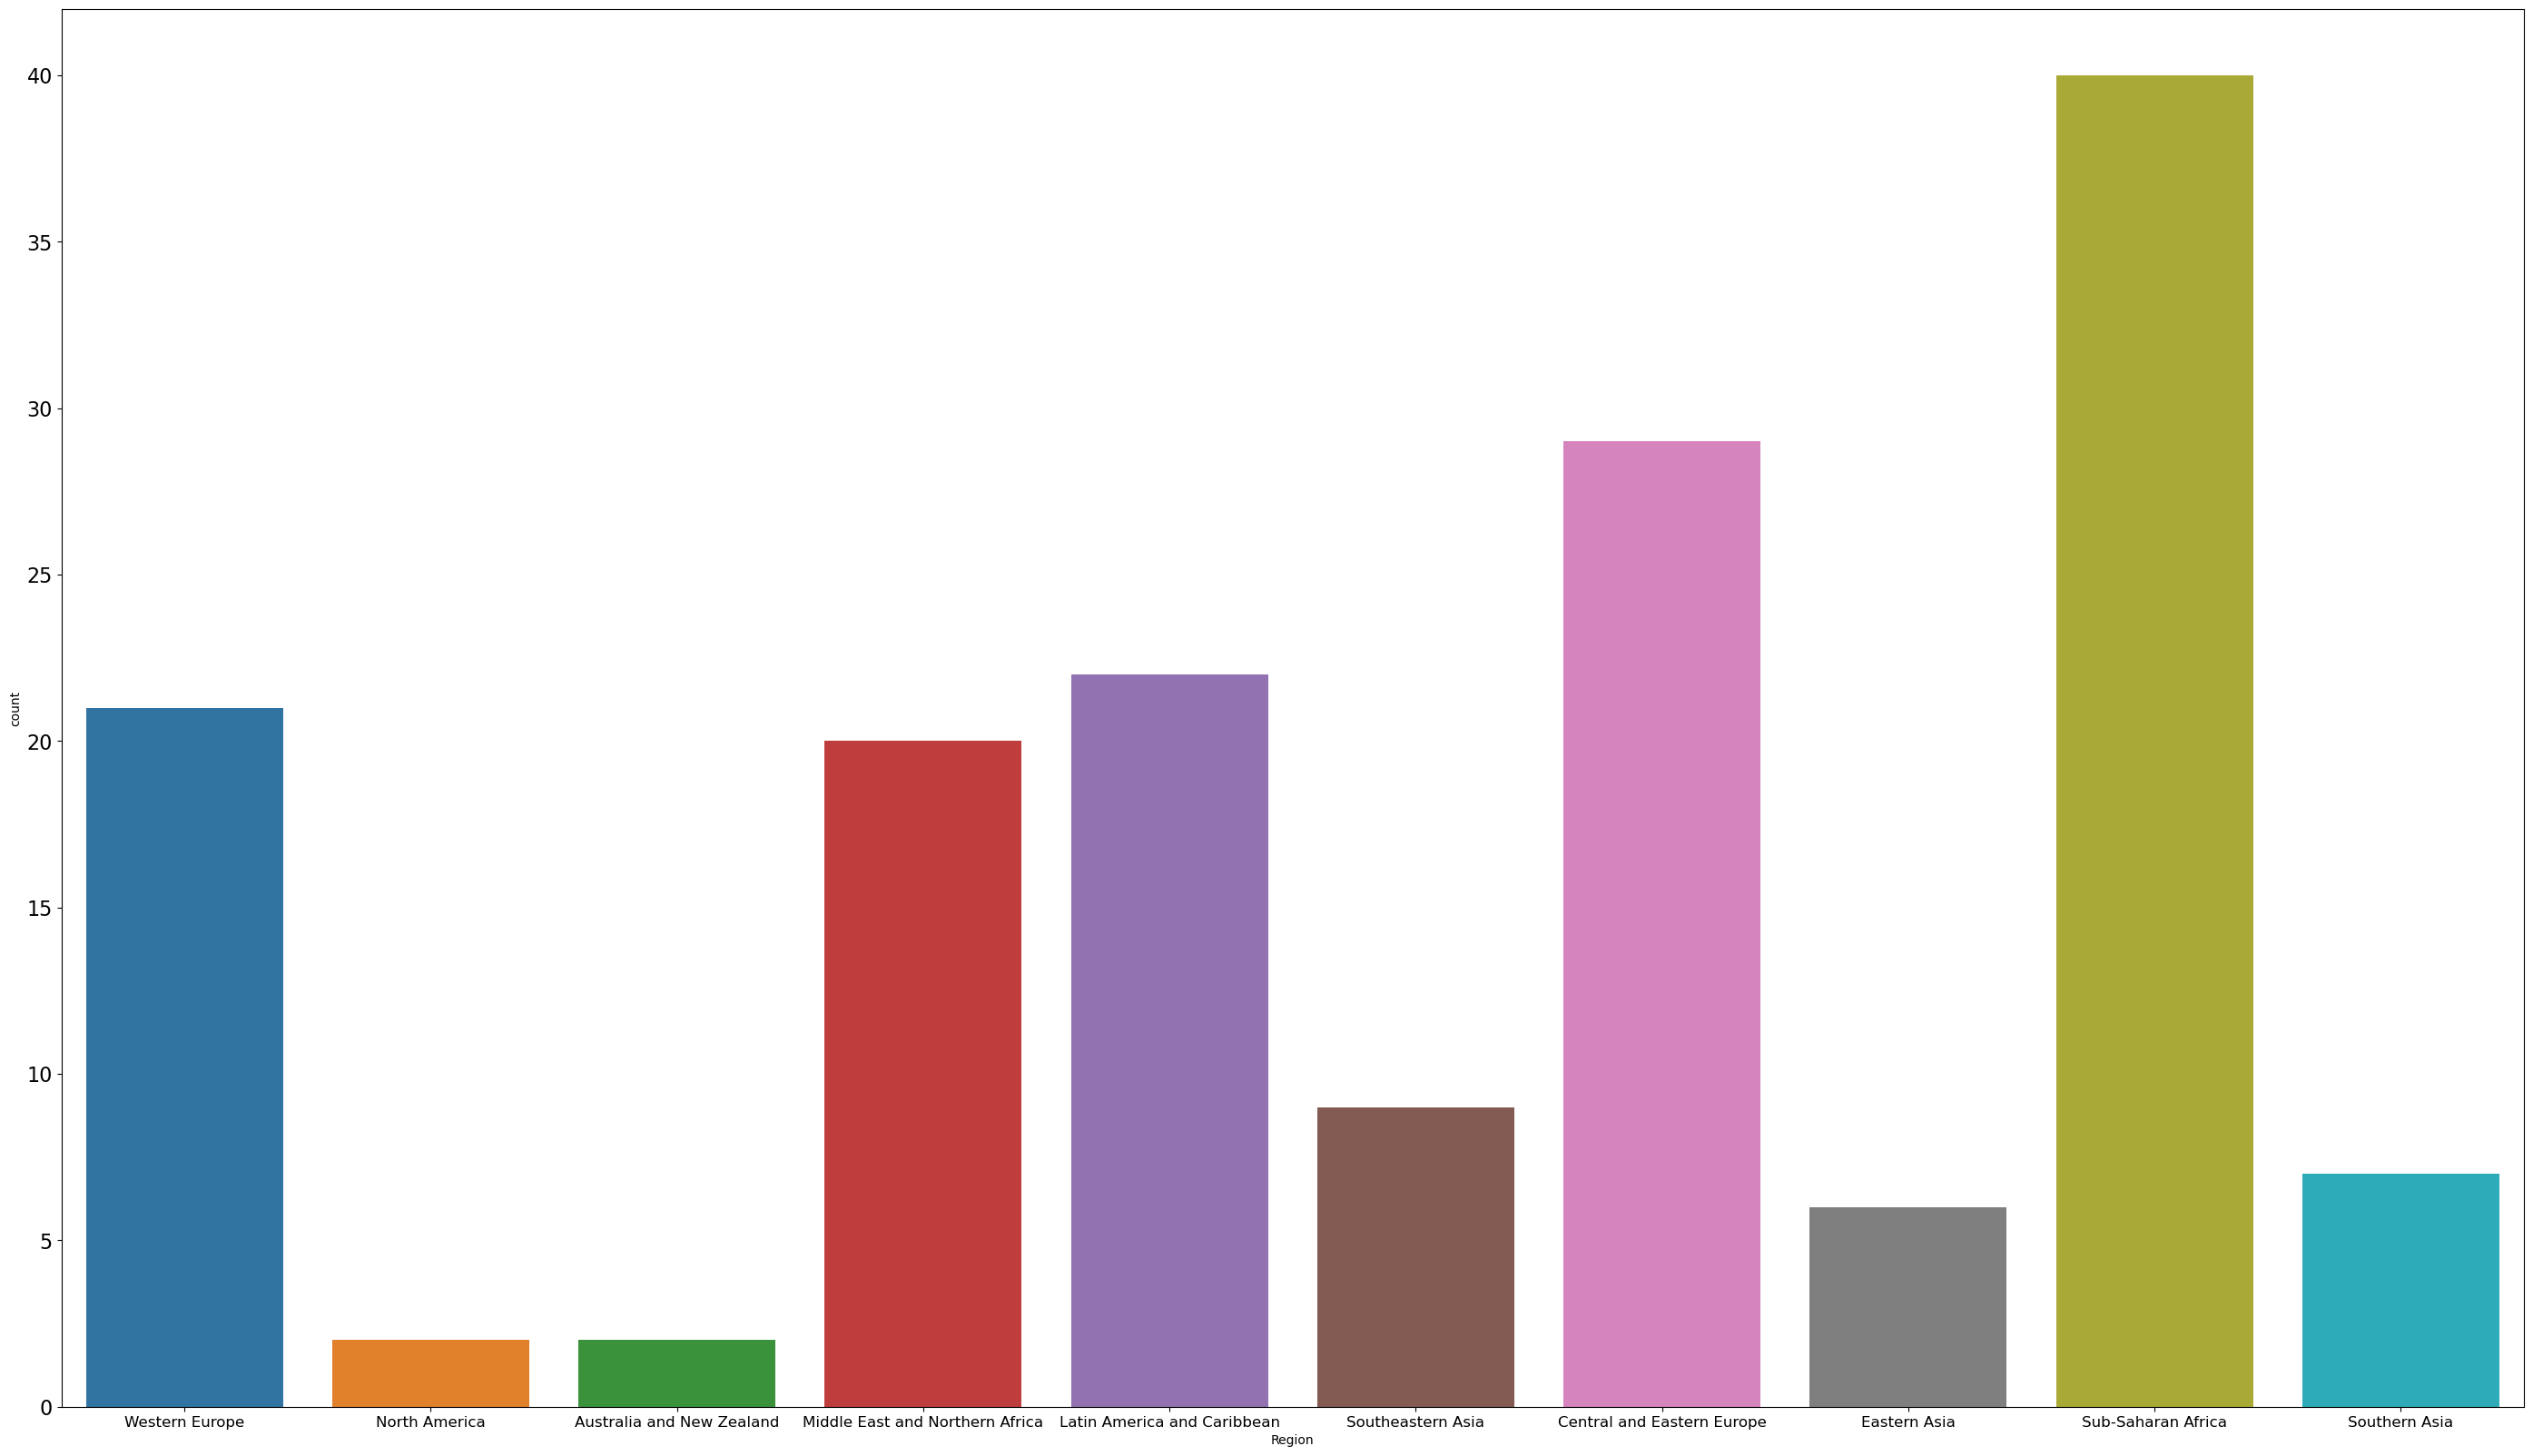

In [152]:
plt.figure(figsize=(35,20))
sns.countplot(df["Region"])
plt.xticks(fontsize=12)  
plt.yticks(fontsize=16)
plt.show()

It is clear from the above plot that most of the data is drawn from Sub-Saharan Africa region as compared to other regions.

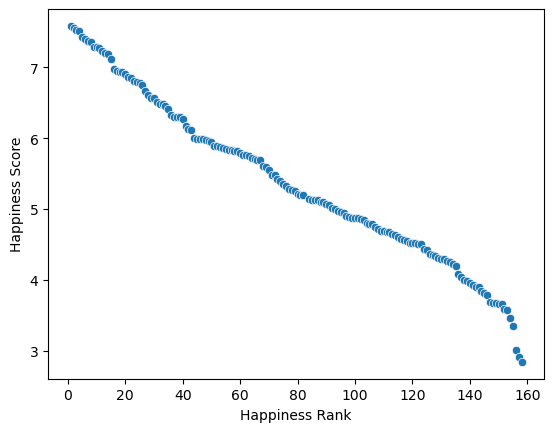

In [153]:
sns.scatterplot(x='Happiness Rank',y='Happiness Score',data=df)
plt.show()

It can be observed that as the Happiness rank increases the Happiness score decreases.

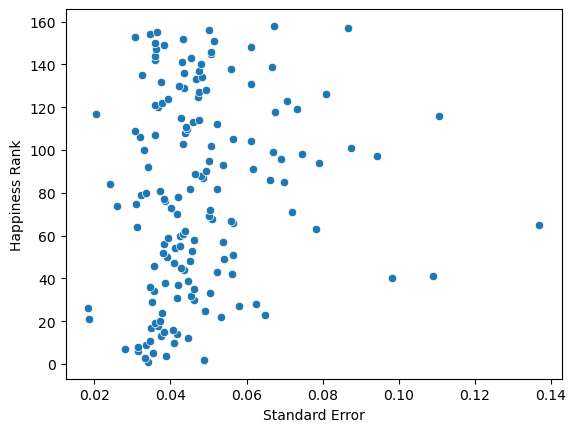

In [154]:
sns.scatterplot(x='Standard Error',y='Happiness Rank',data=df)
plt.show()

We can observe from the plot above that the standard error mainly lies between 0.03 to 0.05.

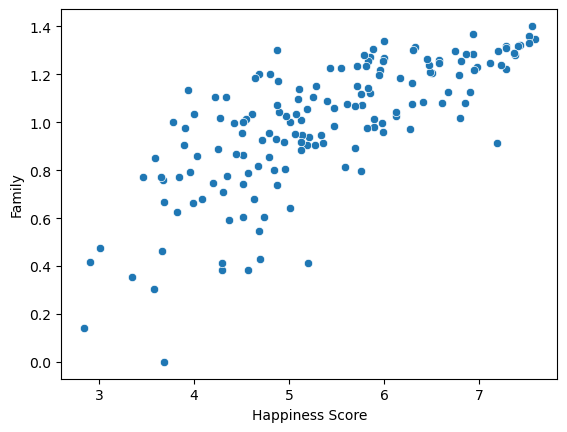

In [155]:
sns.scatterplot(x='Happiness Score',y='Family',data=df)
plt.show()

It will not be wrong to say that family plays a major role in contributing to happiness score.
As the family number is increasing the happiness score is also good.

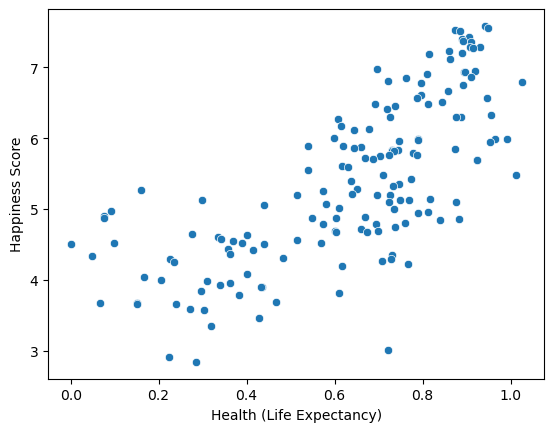

In [156]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)
plt.show()

The health(life expectancy) is good in range 0.6 to 1.0 where happiness score is 5 and above.
When the health is good it contributes to good happiness score.

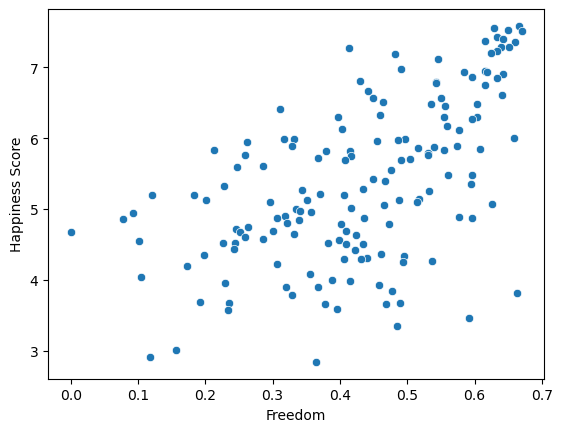

In [157]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=df)
plt.show()

The relation between freedom and happiness score is very clear,
more the freedom more will be the happiness score as people are happy when they have freedomm to do what they wish.

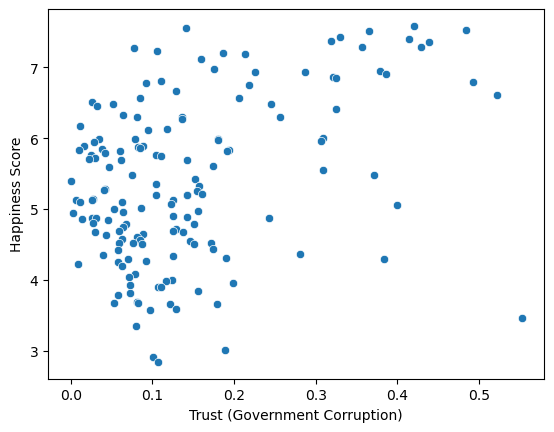

In [158]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df)
plt.show()

The more people of the country trust the government and the government is not corrupted the higher is the happiness score.
Simply less the corruption more will be the happiness score.

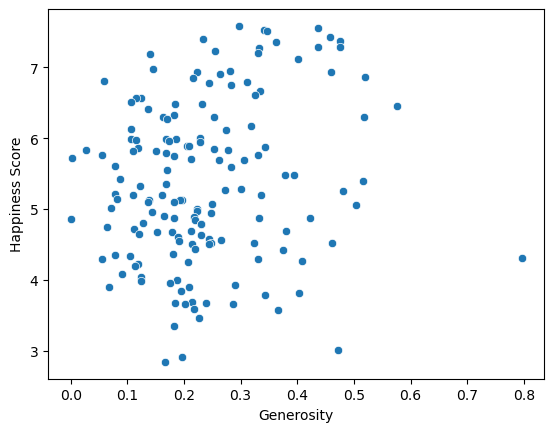

In [159]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)
plt.show()

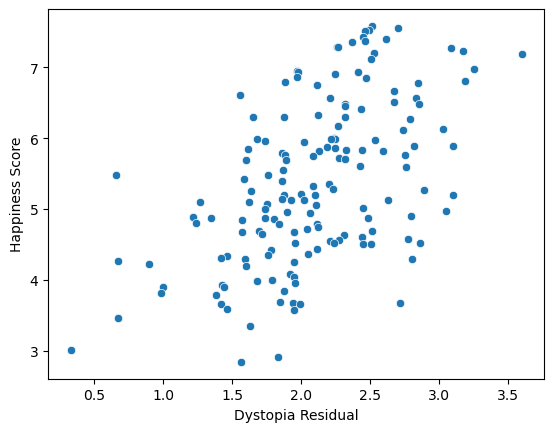

In [160]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df)
plt.show()

The dystopia residual is more between the happiness score of range >4<6.

# STATISTICAL ANALYSIS

In [161]:
df=df.drop(['Country','Region','Happiness Rank'],axis=1)

Dropping the columns namely "Country", "Region", "Happiness Rank" as they do not affect our target variable that is Happiness Score
so it will be okay to drop them.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


Text(0.5, 1.0, 'Correlation Factors Heat Map')

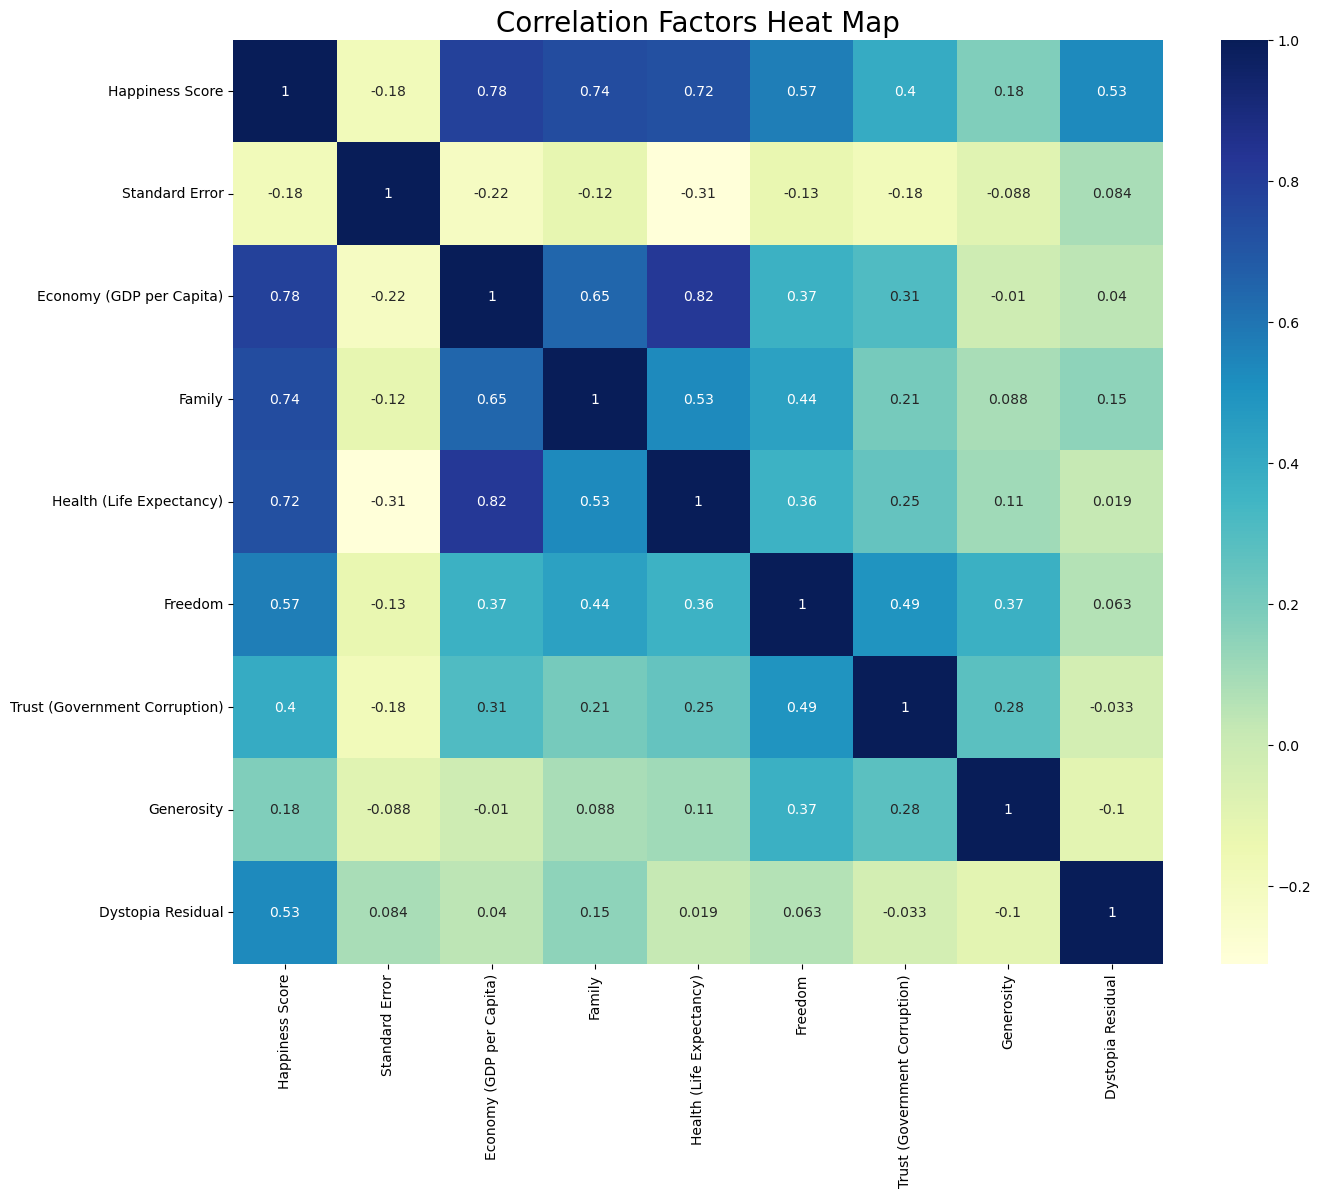

In [163]:
plt.figure(figsize=(15,12))                 #Plotting Heat Map
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu').set_title('Correlation Factors Heat Map', size='20')

Generosity and Standard error have very low correlation with the target column i.e, Happiness Score.

Economy(GDP per capita), Family and Health(Life Expectancy) have a very positive correlation with the target variable i.e, Happines Score.

Dystopia is also having a positive correlation with the Happiness Score.

In [164]:
df.skew()                                #checking for skewness in the data.

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Columns having skewness:

Standard Error

Family

Health(Life Expectancy)

Trust(Government Corruption)

Generosity

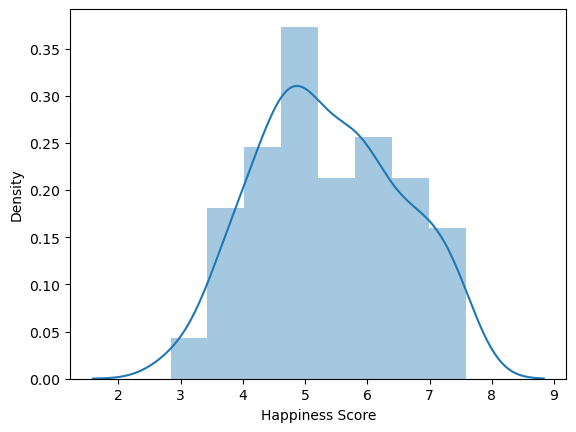

In [165]:
sns.distplot(df['Happiness Score'])
plt.show()

The data seems to be quite normally distributed almost no skewness.

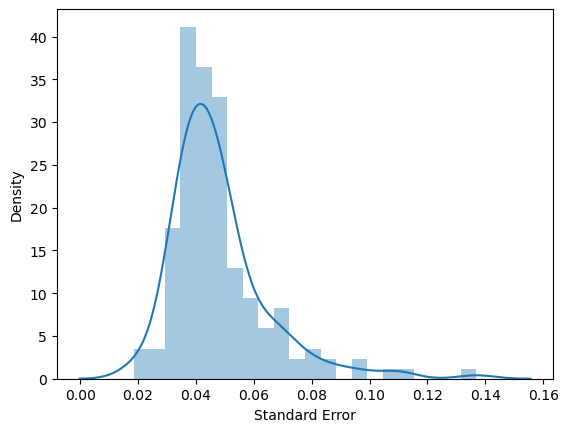

In [166]:
sns.distplot(df['Standard Error'])
plt.show()

Skewness is present. The data is skewed to the right.

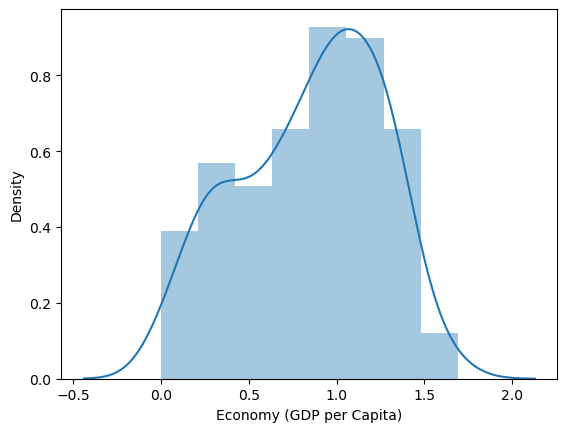

In [167]:
sns.distplot(df['Economy (GDP per Capita)'])
plt.show()

The data is slightly skewed to left.

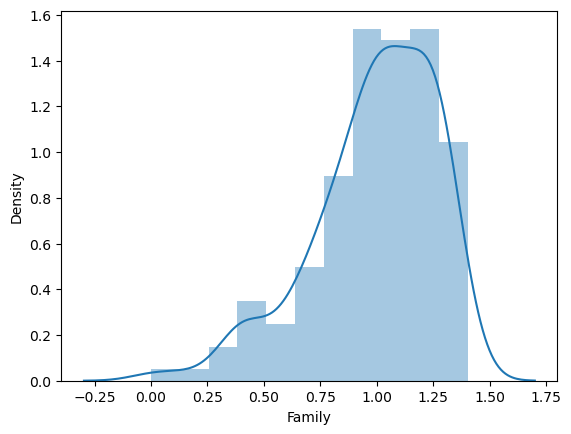

In [168]:
sns.distplot(df['Family'])
plt.show()

Skewness is present, the data is skewed to left.

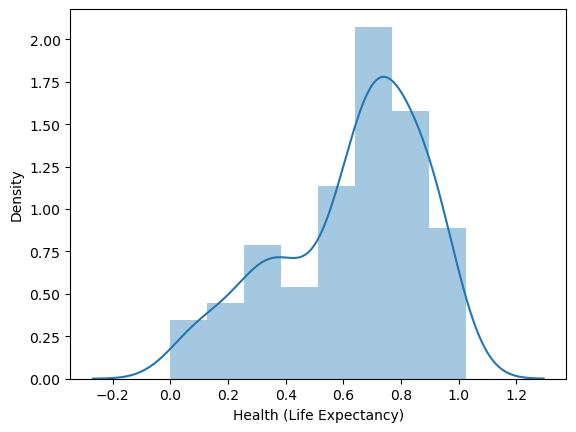

In [169]:
sns.distplot(df['Health (Life Expectancy)'])
plt.show()

The data is skewed to left.

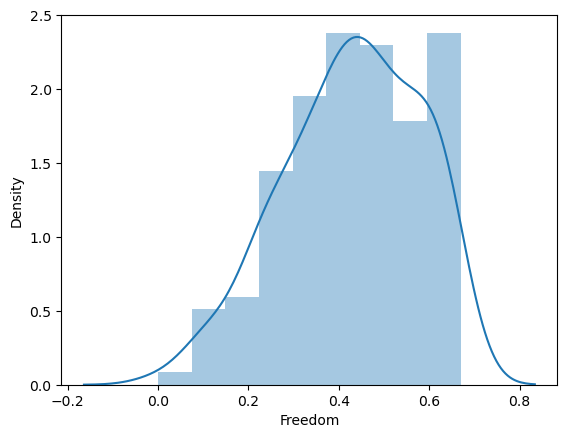

In [170]:
sns.distplot(df['Freedom'])
plt.show()

Even distribution can be seen.

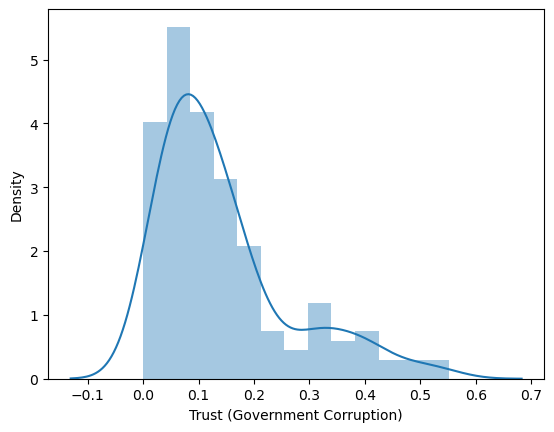

In [171]:
sns.distplot(df['Trust (Government Corruption)'])
plt.show()

The data is skewed to the right.

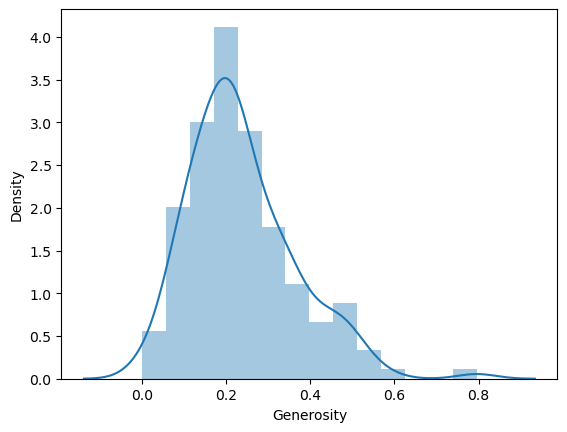

In [172]:
sns.distplot(df['Generosity'])
plt.show()

The data is slightly skewed to the right.

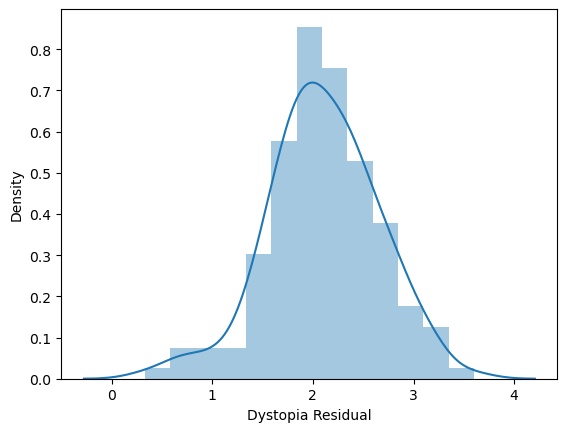

In [173]:
sns.distplot(df['Dystopia Residual'])
plt.show()

Data possesses normal distribution.

In [174]:
df.drop(['Standard Error','Generosity'], axis=1, inplace=True)    #dropping the columns.
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,1.83302


It was better to drop the Standard Error and Generosity columns because of the 
presence of skewness andn they were very less correlated with the target variable.

In [175]:
df.dtypes

Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object

All the values now present in the dataset are having Float64 datatype so need of any label technique.

# OUTLIER DETECTION

In [176]:
df.columns

Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Dystopia Residual'],
      dtype='object')

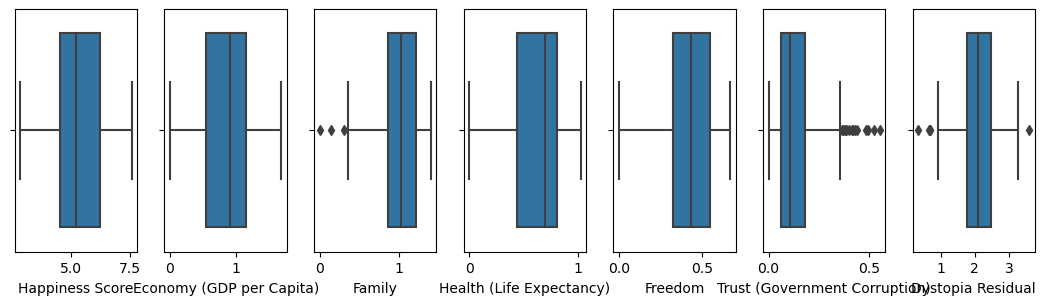

In [177]:
colms=['Happiness Score','Economy (GDP per Capita)',
       'Family','Health (Life Expectancy)','Freedom',
       'Trust (Government Corruption)','Dystopia Residual']
ncolms=30
nrows=20
plt.figure(figsize=(ncolms,3*ncolms))
for i in range(0,len(colms)):
    plt.subplot(ncolms,nrows,i+1)
    sns.boxplot(df[colms[i]],orient='r')
    plt.tight_layout()

Outliers present in the columns:-

A- FAMILY

B- TRUST (GOVERNMENT CORRUPTION)

C- DYSTOPIA RESIDUAL

# USING THE ZSCORE FOR CHECKING

In [178]:
from scipy.stats import zscore
x=np.abs(zscore(df))
x

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.758258
1,1.914581,1.135226,1.514458,1.289434,1.332456,0.016480,1.092857
2,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.712335
3,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.663893
4,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,0.639337
...,...,...,...,...,...,...,...
153,1.674055,1.552987,0.800520,0.818610,1.087740,3.413922,2.588925
154,1.783571,1.392303,2.346860,1.263362,0.372033,0.529210,0.843967
155,2.076199,0.455245,1.901086,0.372199,1.809238,0.381419,3.208430
156,2.164688,2.067566,2.118467,1.649648,2.064472,0.357715,0.481985


In [179]:
print(np.where(x>3))

(array([ 27, 147, 153, 155, 157], dtype=int64), array([5, 2, 5, 6, 2], dtype=int64))


In [180]:
dfnew=df[(x<3).all(axis=1)]
print("Original Shape=",df.shape)
print("New Shape=",dfnew.shape)

Original Shape= (158, 7)
New Shape= (153, 7)


In [181]:
print("Percantage loss=",((158-153)/158)*100)

Percantage loss= 3.1645569620253164


The data loss is very less as compared to the size of the dataset so we can drop it.

# ASSIGNING THE FEATURE AND TARGET VARIABLES

In [182]:
X=dfnew.drop(['Happiness Score'], axis=1)               #FEATURE VARIABLES
X

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176
...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,1.41723
151,0.25812,0.85188,0.27125,0.39493,0.12832,1.46494
152,0.31982,0.30285,0.30335,0.23414,0.09719,1.95210
154,0.28665,0.35386,0.31910,0.48450,0.08010,1.63328


In [183]:
Y=dfnew['Happiness Score']           #TARGET VARIABLE
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 153, dtype: float64

It is clearly shown on the above 2 cells that the feature and label data have been succesfully separated using the new data set of 153 rows each.

# TRANFORMATION AND SCALING

In [184]:
X=power_transform(X,method='yeo-johnson')
X

array([[ 1.49533495e+00,  1.66651778e+00,  1.48458516e+00,
         1.76895699e+00,  1.82520967e+00,  7.51971405e-01],
       [ 1.20058451e+00,  2.01576571e+00,  1.52582536e+00,
         1.45212783e+00,  3.47782848e-01,  1.10951985e+00],
       [ 1.27226398e+00,  1.73823779e+00,  1.07189739e+00,
         1.62818656e+00,  1.95995472e+00,  7.03015689e-01],
       [ 1.69559649e+00,  1.54816774e+00,  1.13516484e+00,
         1.80548030e+00,  1.67308466e+00,  6.51405768e-01],
       [ 1.27478031e+00,  1.49575387e+00,  1.25955064e+00,
         1.48772136e+00,  1.55087466e+00,  6.25255922e-01],
       [ 1.16343474e+00,  1.46860318e+00,  1.15870059e+00,
         1.56208497e+00,  1.81023853e+00,  9.49647403e-01],
       [ 1.28457212e+00,  1.23629258e+00,  1.18130761e+00,
         1.34279323e+00,  1.50670361e+00,  6.52158543e-01],
       [ 1.29163440e+00,  1.28970745e+00,  1.29193182e+00,
         1.71853734e+00,  1.86875590e+00,  4.69938539e-01],
       [ 1.04112250e+00,  1.47738971e+00,  1.276

In [185]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(X)
X
X=pd.DataFrame(X)
X.columns=('Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Dystopia Residual')
X

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,0.863050,0.915005,0.860684,0.991245,0.961785,0.623130
1,0.788961,1.000000,0.870897,0.915303,0.585391,0.686680
2,0.806978,0.932459,0.758478,0.957503,0.996113,0.614428
3,0.913388,0.886202,0.774147,1.000000,0.923029,0.605255
4,0.807611,0.873447,0.804952,0.923834,0.891894,0.600607
...,...,...,...,...,...,...
148,0.228983,0.255701,0.068573,0.615529,0.674293,0.250582
149,0.119268,0.321438,0.137964,0.493676,0.549687,0.266491
150,0.150665,0.000000,0.159177,0.261493,0.453165,0.430298
151,0.133650,0.019009,0.170002,0.643015,0.392008,0.322822


We can see after scaling all the values are converted between 0-1.

# CREATING THE TRAINING AND TESTING DATA SETS

In [186]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25, random_state=42, shuffle=True)

Here i am going to take 25 percent of the total data present in the dataset for training purpose rest 75 percent of the data of dataset will be used in testing.

# MACHINE LEARNING MODEL FOR REGRESSION

In [187]:
linear_model=LinearRegression()
svr_model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtr_model=DecisionTreeRegressor(criterion="poisson", random_state=111)
rfr_model=RandomForestRegressor(max_depth=2, max_features="sqrt")
knr_model=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')

In [188]:
linear_model.fit(X_train,Y_train)                      #TRAINING THE MODELS
svr_model.fit(X_train,Y_train)
dtr_model.fit(X_train,Y_train)
rfr_model.fit(X_train,Y_train)
knr_model.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

In [189]:
pred_linear=linear_model.predict(X_test)                #PREDICTIONS
pred_svr=svr_model.predict(X_test)
pred_dtr=dtr_model.predict(X_test)
pred_rfr=rfr_model.predict(X_test)
pred_knr=knr_model.predict(X_test)

# EVALUATION METRICS

In [190]:
mse_linear=mean_squared_error(Y_test, pred_linear)
mse_svr=mean_squared_error(Y_test, pred_svr)
mse_dtr=mean_squared_error(Y_test, pred_dtr)
mse_rfr=mean_squared_error(Y_test, pred_rfr)
mse_knr=mean_squared_error(Y_test, pred_knr)

rmse_linear=sqrt(mse_linear)
rmse_svr=sqrt(mse_svr)
rmse_dtr=sqrt(mse_dtr)
rmse_rfr=sqrt(mse_rfr)
rmse_knr=sqrt(mse_knr)

print(f"RMSE of Linear Regression is: ",rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)
print(f"RMSE of Decision Tree Regressor is: ", rmse_dtr)
print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  0.09384843961340039
RMSE of Support Vector Regression is:  0.4565385274751157
RMSE of Decision Tree Regressor is:  0.7609033767292328
RMSE of Random Forest Regressor is:  0.5273410867630547
RMSE of K Neighbors Regressor is:  0.36248447358437796


In [191]:
print(f"R2 Score for Linear Regression is: ", r2_score(Y_test, pred_linear, multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is: ", r2_score(Y_test, pred_svr, multioutput='variance_weighted')*100)
print(f"R2 Score for Decision Tree Regressor is: ", r2_score(Y_test, pred_dtr, multioutput='variance_weighted')*100)
print(f"R2 Score for Random Forest Regressor is: ", r2_score(Y_test, pred_rfr, multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor is: ", r2_score(Y_test, pred_knr, multioutput='variance_weighted')*100)

R2 Score for Linear Regression is:  99.10101661020076
R2 Score for Support Vector Regression is:  78.72583992978217
R2 Score for Decision Tree Regressor is:  40.904205196442625
R2 Score for Random Forest Regressor is:  71.61553094607443
R2 Score for K Neighbors Regressor is:  86.58853028432726


Using the R2 score to evaluate the models and check the accuracy by which we will be able to choose the best regression model.
Comparing the RMSE score and R2 score it is clear that Linear regression model has the lowest RMSE score and the highest R2 score it is the best model.

# HYPER PARAMETER TUNING ON THE BEST MACHINE LEARNING MODEL

In [192]:
lt_param={'fit_intercept':[True,False],'normalize':[True,False], 
            'copy_X':[True,False],'n_jobs':[1,2,3,4,5,6,7,8,9,10],'positive':[True,False]}

Here i listed all the parameters available for Linear regression model.

In [193]:
RSCV=RandomizedSearchCV(LinearRegression(),lt_param,cv=5)

In [194]:
RSCV.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'normalize': [True, False],
                                        'positive': [True, False]})

In [195]:
RSCV.best_params_

{'positive': True,
 'normalize': True,
 'n_jobs': 4,
 'fit_intercept': True,
 'copy_X': False}

With the help of best_params i am able to identify the most fitted parameters which can be used in final model.

In [196]:
Final_Model=LinearRegression(positive=True, normalize=True, n_jobs=10, fit_intercept=True, copy_X=True)
Classifier=Final_Model.fit(X_train, Y_train)
lr_pred=Final_Model.predict(X_test)
lr_r2_score=r2_score(Y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: -8948.540273210703


By using the hyper parameter tuning i am able to get the optimal R2 score for the final model.

# SAVING THE FINAL MODEL USING PICKLE

In [197]:
name="World Happiness Report.pkl"
pickle.dump(Final_Model,open(name,'wb'))

# LOADING THE SAVED MODEL

In [198]:
model=pickle.load(open(name,'rb'))
result=model.score(X_test,Y_test)*100
print(result)

-8948.540273210703


Finally i have saved the loaded model and passed the unseen dataset to predict the model score.

In [199]:
P=np.array(Y_test)
P

array([5.124, 5.102, 4.876, 4.565, 6.505, 4.571, 5.212, 5.192, 6.937,
       6.983, 6.901, 7.2  , 7.284, 6.003, 5.878, 5.477, 4.681, 3.995,
       5.689, 4.885, 5.286, 4.419, 6.477, 5.605, 5.828, 6.485, 6.67 ,
       4.252, 4.033, 6.298, 4.61 , 4.949, 5.548, 6.81 , 5.984, 5.268,
       7.226, 4.077, 4.218])

In [200]:
predicted=np.array(Final_Model.predict(X_test))
predicted

array([13.73874761, 14.71637263, 12.77561934, 12.06958055, 17.34799391,
       11.71419809, 14.0923814 , 13.77246213, 18.82879896, 17.99483237,
       18.24613423, 19.25421906, 19.33399932, 16.27249498, 15.58575566,
       14.46421181, 12.97760801, 11.17027181, 15.26052043, 13.95236424,
       13.82846839, 11.58569354, 16.89615092, 14.79150044, 15.45225757,
       17.39233751, 17.193456  , 11.53656801, 10.93365891, 16.65473048,
       12.08879321, 12.89858082, 14.94679885, 17.83098475, 16.17346515,
       13.07792719, 18.88215142, 11.21746837, 12.35594237])

In [201]:
DF=pd.DataFrame({'Original':P,'Predicted':predicted})
DF

,Original,Predicted
0,5.124,13.738748
1,5.102,14.716373
2,4.876,12.775619
3,4.565,12.069581
4,6.505,17.347994
5,4.571,11.714198
6,5.212,14.092381
7,5.192,13.772462
8,6.937,18.828799
9,6.983,17.994832


The model has been trained in a very well manner and it predicted accurate values.